<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_04_selfedu_ml_20a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [9]:
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
y_train = [-1, 1, 1, -1, -1, 1, 1, -1, 1, -1]
print(x_train)

[[10, 50, 1], [20, 30, 1], [25, 30, 1], [20, 60, 1], [15, 70, 1], [40, 40, 1], [30, 45, 1], [20, 45, 1], [40, 30, 1], [7, 35, 1]]


[ 0.24371981 -0.13071347  0.01218599]
[[20. 45.  1.]
 [20. 30.  1.]
 [30. 45.  1.]]


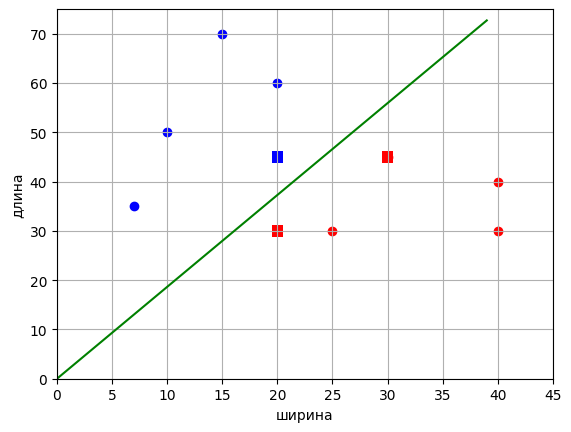

In [15]:
clf = svm.SVC(kernel='linear')      # SVM с линейным ядром
clf.fit(x_train, y_train)           # нахождение вектора w по обучающей выборке

lin_clf = svm.LinearSVC()           # SVM для линейно разделимой выборки (используется для получения вектора w)
lin_clf.fit(x_train, y_train)       # нахождение вектора w по обучающей выборке

v = clf.support_vectors_            # выделение опорных векторов
w = lin_clf.coef_[0]                # коэффициенты линейной модели
# print(w, v, sep='\n')
print(w, v, sep='\n')


# формирование графиков для визуализации полученных результатов
x_train = np.array(x_train)
y_train = np.array(y_train)
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [-x*w[0]/w[1] - w[2] for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
clr = []
for i in range(v.shape[0]):
  if y_train[i] == 1: clr.append('red')
  else: clr.append('blue')
plt.scatter(v[:, 0], v[:, 1], s=70, color=clr, linewidths=0, marker='s')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()